# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Options

In [2]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)
    train_feats = [var for x in train_feats for var in train_feats[x]]

In [3]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
train_fy = FoldYielder(h5py.File(DATA_PATH/'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 16.927s 


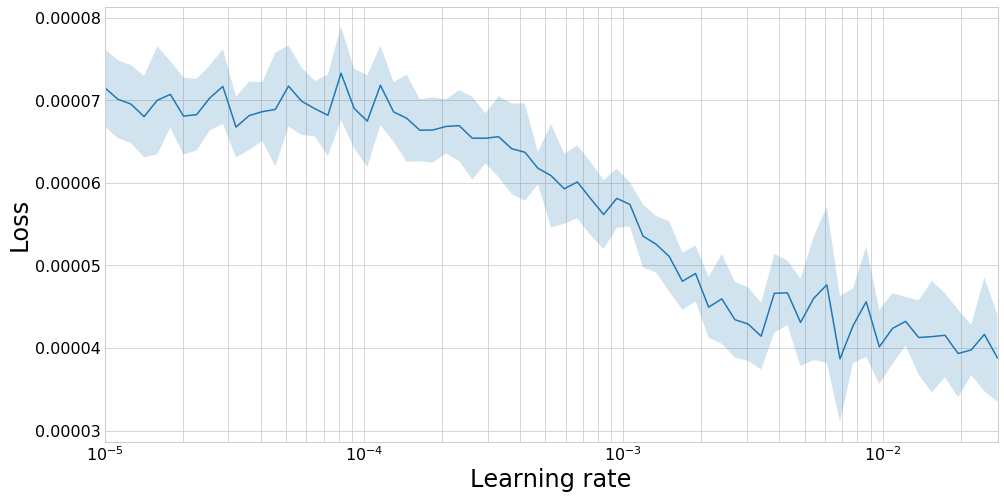

______________________________________



In [5]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [8]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':2, 'reverse':False, 'redux_decay':True, 'scale':2}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.235735). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118223). Check your callbacks.
  % delta_t_median)


1 New best found: 3.707249228027649e-05
Saving snapshot 1
2 New best found: 3.540837593973265e-05
3 New best found: 3.5395308471197495e-05
4 New best found: 3.431058592541376e-05
5 New best found: 3.372227936924901e-05
Saving snapshot 2
6 New best found: 3.3643519632460084e-05
9 New best found: 3.3507455653307263e-05
10 New best found: 3.3285686919407454e-05
11 New best found: 3.3245627699943724e-05
12 New best found: 3.296834302818752e-05
13 New best found: 3.288666486332659e-05
Saving snapshot 3
25 New best found: 3.2883890105586036e-05
26 New best found: 3.2863300401368176e-05
27 New best found: 3.274850650195731e-05
28 New best found: 3.2683108020137294e-05
Saving snapshot 4
30 New best found: 3.2681088378012646e-05
46 New best found: 3.264119821105851e-05
49 New best found: 3.255718158616219e-05
50 New best found: 3.255702990427381e-05
52 New best found: 3.2547574100317434e-05
53 New best found: 3.2518280042131665e-05
54 New best found: 3.247989905066788e-05
55 New best found: 3.2

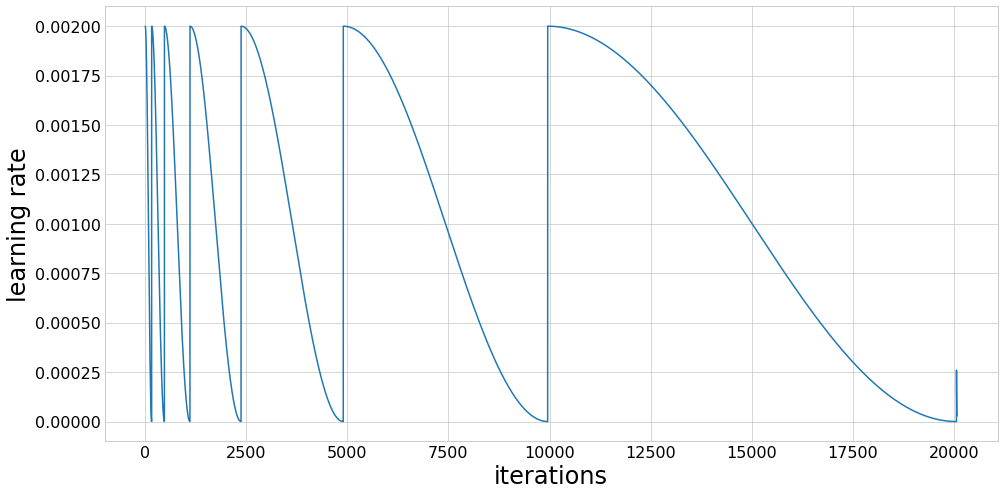

Fold took 263.810s

Training model 2 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.256528). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128635). Check your callbacks.
  % delta_t_median)


1 New best found: 3.576152156019816e-05
Saving snapshot 1
2 New best found: 3.4971877497446255e-05
3 New best found: 3.418376335757785e-05
4 New best found: 3.354779173532734e-05
5 New best found: 3.3102306361251976e-05
Saving snapshot 2
6 New best found: 3.290376965596806e-05
8 New best found: 3.2758786345948466e-05
11 New best found: 3.254925362707581e-05
12 New best found: 3.220503605261911e-05
Saving snapshot 3
14 New best found: 3.219274235598277e-05
21 New best found: 3.1849434538162315e-05
24 New best found: 3.1814101300551556e-05
25 New best found: 3.169319373555482e-05
26 New best found: 3.1673544649675024e-05
28 New best found: 3.15968937575235e-05
29 New best found: 3.158964247559197e-05
Saving snapshot 4
30 New best found: 3.1585403296048754e-05
47 New best found: 3.157795051083667e-05
51 New best found: 3.14855080912821e-05
55 New best found: 3.1406320950191e-05
60 New best found: 3.1401626257866156e-05
61 New best found: 3.1388975055597256e-05
Saving snapshot 5
62 New bes

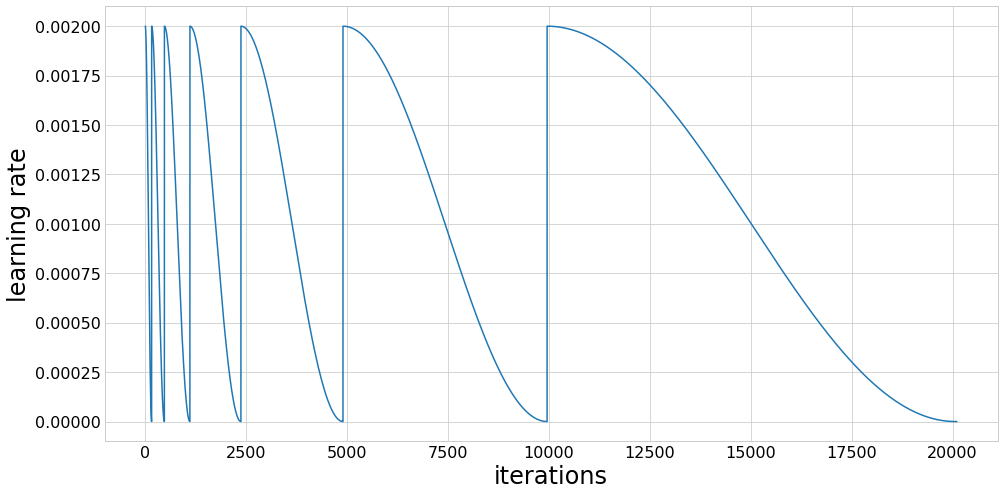

Fold took 295.431s

Training model 3 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.286149). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143466). Check your callbacks.
  % delta_t_median)


1 New best found: 3.6929116947817985e-05
Saving snapshot 1
2 New best found: 3.535729794442811e-05
3 New best found: 3.4599886453248694e-05
4 New best found: 3.3950964710130714e-05
5 New best found: 3.357179307987023e-05
Saving snapshot 2
6 New best found: 3.3458117041767266e-05
9 New best found: 3.3418573500914683e-05
10 New best found: 3.310694481448155e-05
11 New best found: 3.2948523420208465e-05
12 New best found: 3.288866050785826e-05
Saving snapshot 3
24 New best found: 3.275999219620892e-05
25 New best found: 3.254250964556594e-05
27 New best found: 3.248412231236214e-05
28 New best found: 3.2459557625177636e-05
29 New best found: 3.241971800376112e-05
Saving snapshot 4
51 New best found: 3.2276196415329694e-05
57 New best found: 3.2261208934398864e-05
Saving snapshot 5
Saving snapshot 6
CosineAnneal stalling after 126 epochs, entering redux decay at LR=0.00011866523563337172
135 New best found: 3.2258275056550854e-05
Early stopping after 145 epochs
Score is: {'loss': 3.2258275

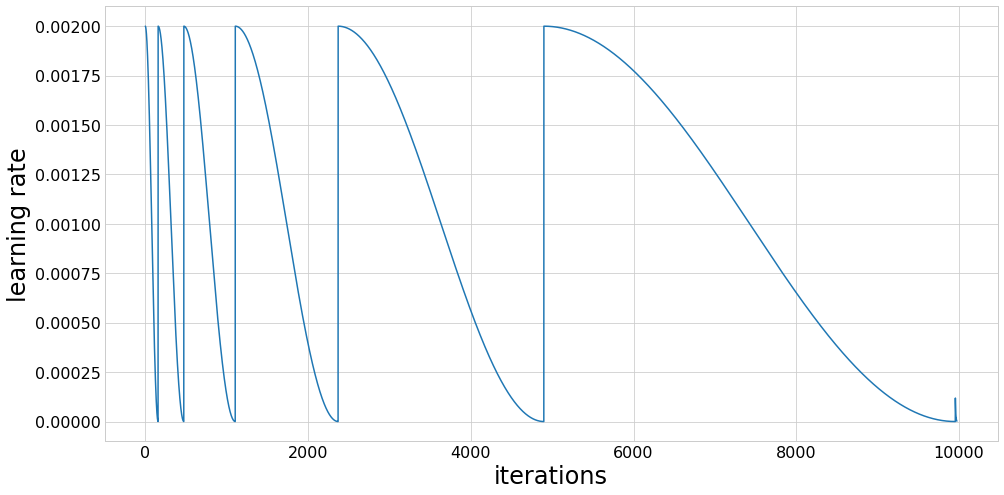

Fold took 152.998s

Training model 4 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.299374). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150019). Check your callbacks.
  % delta_t_median)


1 New best found: 3.701454761564948e-05
Saving snapshot 1
2 New best found: 3.574599443366088e-05
3 New best found: 3.488573138044086e-05
4 New best found: 3.4112627641513694e-05
5 New best found: 3.3406427740908094e-05
Saving snapshot 2
6 New best found: 3.328879096110251e-05
10 New best found: 3.2845545290864174e-05
11 New best found: 3.2632537243359495e-05
12 New best found: 3.262995456372922e-05
13 New best found: 3.260086574677935e-05
Saving snapshot 3
14 New best found: 3.2545940502405726e-05
23 New best found: 3.2538170524951e-05
25 New best found: 3.2279878089834846e-05
27 New best found: 3.2242399976061326e-05
28 New best found: 3.2200500874256774e-05
29 New best found: 3.214873644854121e-05
Saving snapshot 4
30 New best found: 3.214820830557274e-05
49 New best found: 3.2068625874628015e-05
50 New best found: 3.201891782457355e-05
53 New best found: 3.201398210374348e-05
54 New best found: 3.194878442845822e-05
55 New best found: 3.190551385093701e-05
56 New best found: 3.1904

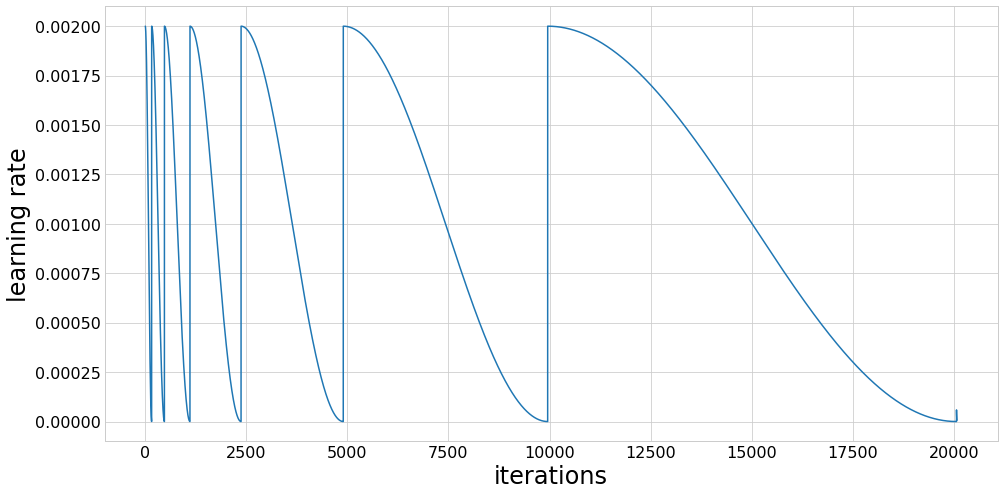

Fold took 274.493s

Training model 5 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.344440). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172668). Check your callbacks.
  % delta_t_median)


1 New best found: 3.642895729981951e-05
Saving snapshot 1
2 New best found: 3.552246968031163e-05
4 New best found: 3.440387765492788e-05
5 New best found: 3.437065547711206e-05
Saving snapshot 2
6 New best found: 3.389966457459093e-05
7 New best found: 3.382595972443767e-05
9 New best found: 3.360720068030446e-05
10 New best found: 3.334497509157887e-05
11 New best found: 3.326527547784231e-05
12 New best found: 3.306221284253572e-05
13 New best found: 3.298432480854269e-05
Saving snapshot 3
14 New best found: 3.296467615785975e-05
21 New best found: 3.2908933603501044e-05
23 New best found: 3.281708425246167e-05
25 New best found: 3.245989135857531e-05
29 New best found: 3.2453323614603243e-05
Saving snapshot 4
43 New best found: 3.2376034233861964e-05
49 New best found: 3.2330183556530236e-05
52 New best found: 3.2292088379775065e-05
55 New best found: 3.228910189150066e-05
56 New best found: 3.228762472021177e-05
57 New best found: 3.223979546391955e-05
58 New best found: 3.2232741

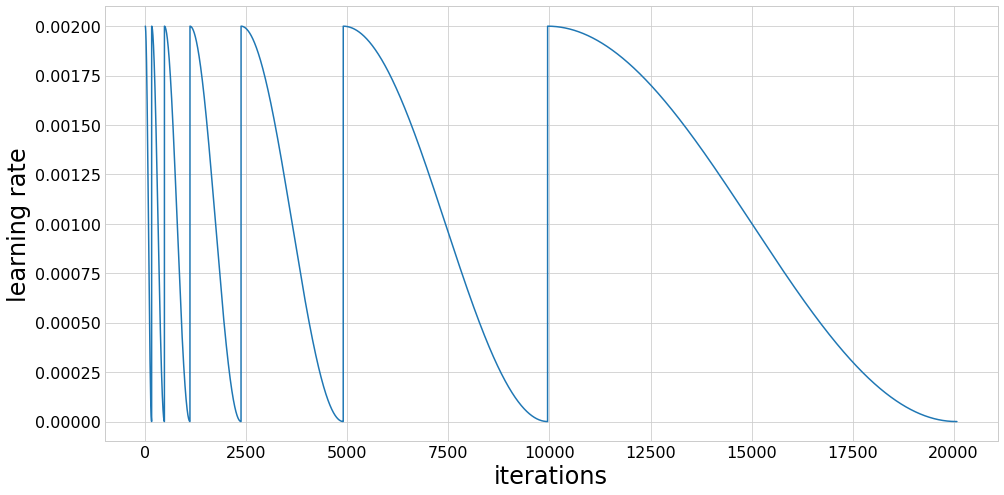

Fold took 283.282s

Training model 6 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.367335). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184070). Check your callbacks.
  % delta_t_median)


1 New best found: 3.635301263711881e-05
Saving snapshot 1
2 New best found: 3.5594319060328415e-05
3 New best found: 3.5328590557037386e-05
4 New best found: 3.405086481798207e-05
5 New best found: 3.390126630110899e-05
Saving snapshot 2
6 New best found: 3.375940393598285e-05
9 New best found: 3.3438940862833986e-05
10 New best found: 3.327877113188151e-05
11 New best found: 3.314276459423127e-05
13 New best found: 3.28737532676314e-05
Saving snapshot 3
14 New best found: 3.2867035984236284e-05
23 New best found: 3.27724147864501e-05
25 New best found: 3.268036207591649e-05
27 New best found: 3.2623521609639286e-05
28 New best found: 3.255981862457702e-05
29 New best found: 3.255486278940225e-05
Saving snapshot 4
48 New best found: 3.245134775934275e-05
54 New best found: 3.2414627919206395e-05
55 New best found: 3.231307336245663e-05
58 New best found: 3.230426432855893e-05
59 New best found: 3.230370570381637e-05
Saving snapshot 5
100 New best found: 3.220675230550114e-05
109 New be

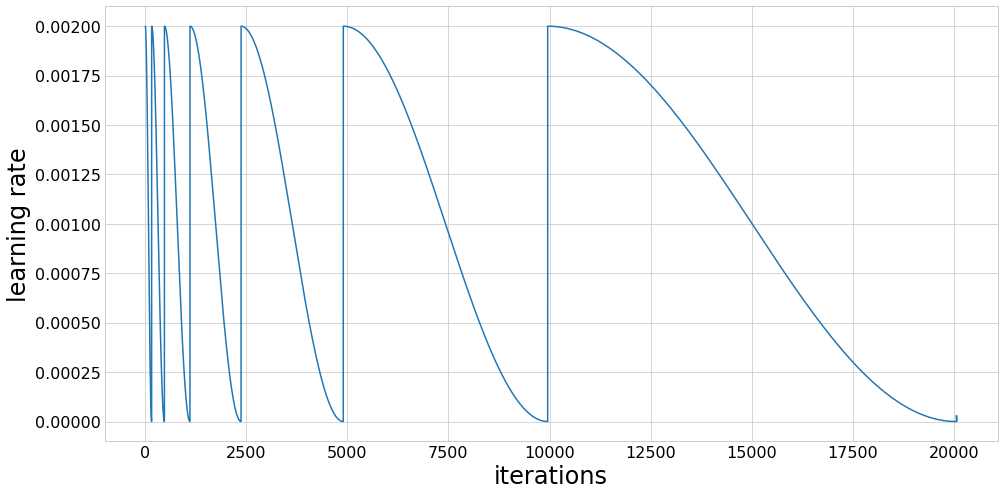

Fold took 284.914s

Training model 7 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.392712). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196767). Check your callbacks.
  % delta_t_median)


1 New best found: 3.4904918280404485e-05
Saving snapshot 1
2 New best found: 3.414576486054573e-05
3 New best found: 3.358505471870479e-05
4 New best found: 3.257878901755902e-05
5 New best found: 3.221184667463471e-05
Saving snapshot 2
6 New best found: 3.2079003476580056e-05
9 New best found: 3.2006020139456365e-05
10 New best found: 3.162904779309538e-05
11 New best found: 3.1612316409312964e-05
12 New best found: 3.146824789466636e-05
13 New best found: 3.1216779180053446e-05
Saving snapshot 3
14 New best found: 3.1196234778366566e-05
23 New best found: 3.1121341456528324e-05
24 New best found: 3.110873166971015e-05
25 New best found: 3.104561743218065e-05
26 New best found: 3.089032942836604e-05
27 New best found: 3.082507182939041e-05
Saving snapshot 4
48 New best found: 3.077693458587621e-05
49 New best found: 3.0698413437427404e-05
50 New best found: 3.064111276206722e-05
53 New best found: 3.0573426706276426e-05
57 New best found: 3.053468466709282e-05
58 New best found: 3.052

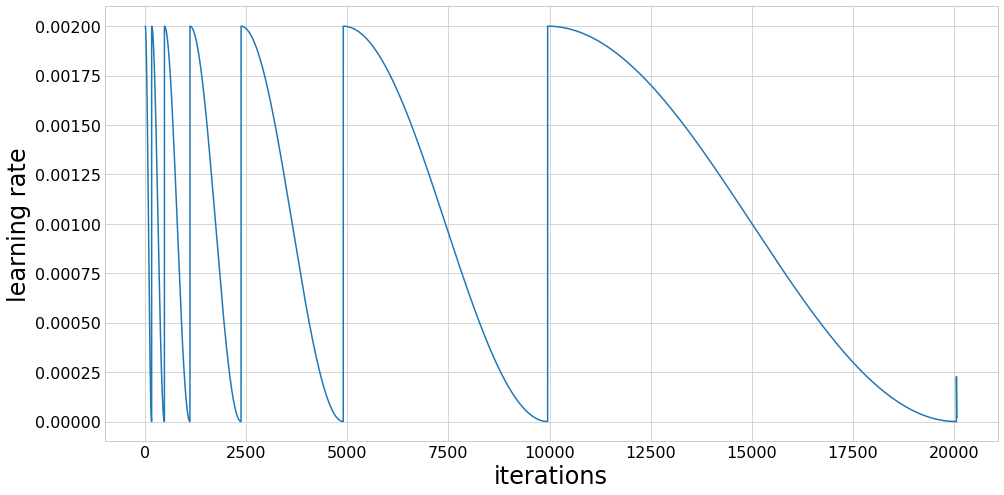

Fold took 284.999s

Training model 8 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.438509). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.219658). Check your callbacks.
  % delta_t_median)


1 New best found: 3.565422744866695e-05
Saving snapshot 1
2 New best found: 3.5122492948692364e-05
3 New best found: 3.49914825389567e-05
4 New best found: 3.374319333061406e-05
5 New best found: 3.322935641547191e-05
Saving snapshot 2
6 New best found: 3.3094338508999306e-05
8 New best found: 3.304819794039247e-05
9 New best found: 3.271177758850518e-05
10 New best found: 3.269325860023942e-05
12 New best found: 3.240891799211222e-05
13 New best found: 3.2384762311916134e-05
Saving snapshot 3
14 New best found: 3.236078805343828e-05
25 New best found: 3.2267795425376655e-05
26 New best found: 3.209278222558511e-05
27 New best found: 3.2064882700132236e-05
28 New best found: 3.196160231539633e-05
Saving snapshot 4
50 New best found: 3.189928230856067e-05
55 New best found: 3.182899768307025e-05
Saving snapshot 5
Saving snapshot 6
CosineAnneal stalling after 126 epochs, entering redux decay at LR=0.00022777852649451198
127 New best found: 3.17968437862319e-05
Early stopping after 137 ep

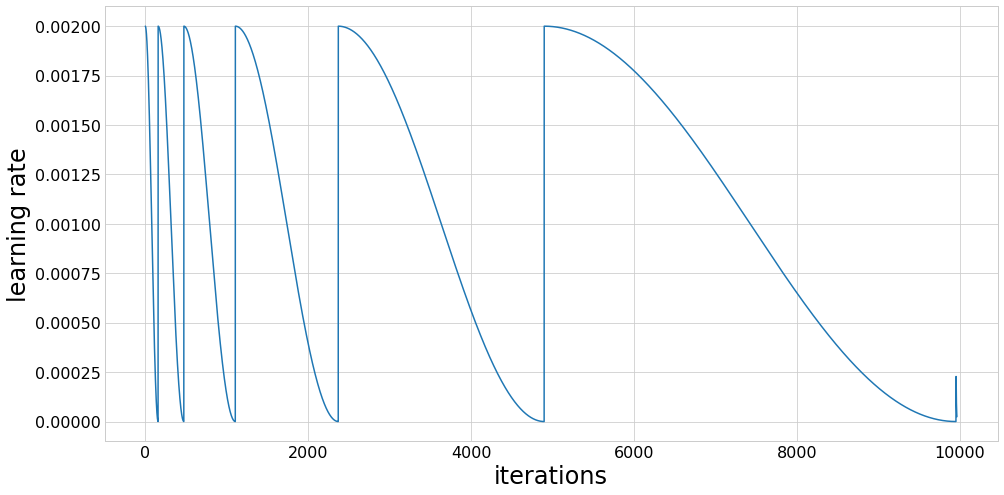

Fold took 151.534s

Training model 9 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.461880). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.231341). Check your callbacks.
  % delta_t_median)


1 New best found: 3.5784887871705e-05
Saving snapshot 1
2 New best found: 3.476097474558628e-05
3 New best found: 3.381043383851647e-05
4 New best found: 3.293720266374294e-05
5 New best found: 3.253353083127877e-05
Saving snapshot 2
6 New best found: 3.240819085112889e-05
10 New best found: 3.2221798071987e-05
11 New best found: 3.204701529830345e-05
13 New best found: 3.1936659003986276e-05
Saving snapshot 3
14 New best found: 3.1905340345110744e-05
23 New best found: 3.164262057835003e-05
24 New best found: 3.1609123758971694e-05
26 New best found: 3.148277540021809e-05
28 New best found: 3.1432671534275866e-05
29 New best found: 3.143192069110228e-05
Saving snapshot 4
46 New best found: 3.1360659852362005e-05
52 New best found: 3.133157224583556e-05
53 New best found: 3.1258226865611506e-05
54 New best found: 3.125383071019314e-05
55 New best found: 3.125109053289634e-05
58 New best found: 3.1206507187744134e-05
59 New best found: 3.11593576654559e-05
60 New best found: 3.115750687

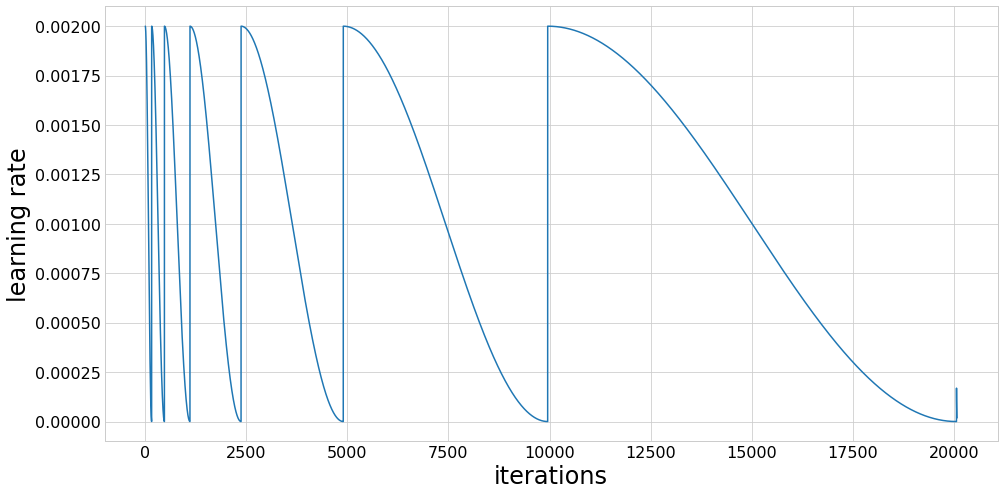

Fold took 289.561s

Training model 10 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.499884). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.250400). Check your callbacks.
  % delta_t_median)


1 New best found: 3.5778036365561985e-05
Saving snapshot 1
2 New best found: 3.483677848671412e-05
3 New best found: 3.4505249592421196e-05
4 New best found: 3.376081115878004e-05
5 New best found: 3.31769313357812e-05
Saving snapshot 2
6 New best found: 3.299308732688947e-05
10 New best found: 3.2679065985452884e-05
11 New best found: 3.2228102462591916e-05
12 New best found: 3.2099556310538284e-05
13 New best found: 3.2000203125103365e-05
Saving snapshot 3
14 New best found: 3.1994653820513184e-05
22 New best found: 3.197002335990563e-05
24 New best found: 3.189383632617344e-05
25 New best found: 3.1832109479825646e-05
26 New best found: 3.1799194458801646e-05
27 New best found: 3.166920305880733e-05
28 New best found: 3.162806827521238e-05
29 New best found: 3.1627479662757187e-05
Saving snapshot 4
30 New best found: 3.162601234273239e-05
46 New best found: 3.160039656204774e-05
49 New best found: 3.157333378403572e-05
52 New best found: 3.154157979221967e-05
54 New best found: 3.15

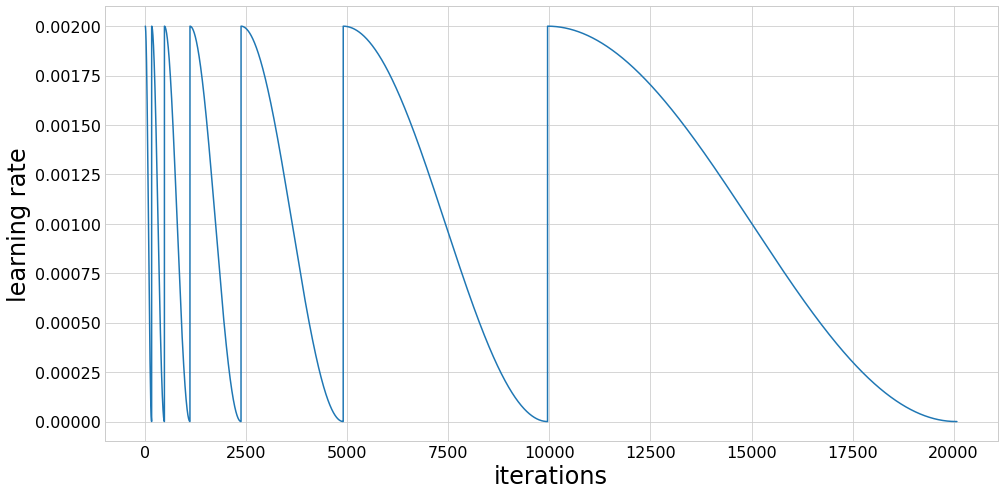

Fold took 301.351s


______________________________________
Training finished
Cross-validation took 2582.579s 


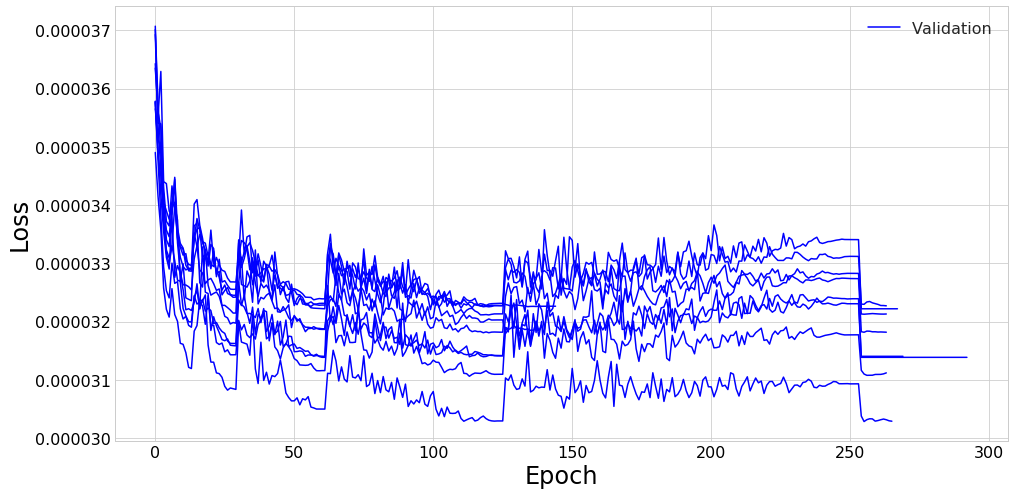

Mean loss = 3.17e-05 +- 2e-07
Mean wAUC = 0.0629 +- 0.0008
Mean AUC = 0.0978 +- 0.0008
Mean AMS = 3.88 +- 0.09
Mean cut = 0.953 +- 0.005
______________________________________



<Figure size 432x288 with 0 Axes>

In [9]:
results, histories, cycle_losses = fold_train_model(train_fy, n_models,
                                                    model_gen_params=model_gen_params,
                                                    train_params=train_params, train_on_weights=True,
                                                    use_callbacks=use_callbacks, ams_args=ams_args,
                                                    max_epochs=max_epochs, patience=patience,
                                                    verbose=1, plots=plots)

## Construct ensemble

In [10]:
with open('train_weights/results_file.pkl', 'rb') as fin:   
    results = pickle.load(fin)
with open('train_weights/cycle_file.pkl', 'rb') as fin:   
    cycle_losses = pickle.load(fin)

In [ ]:
ensemble, weights = assemble_ensemble(results, 10, ensemble_mode, compile_args, weighting='reciprocal')


In [11]:
def test_ensemble(size, n_cycles):
    ensemble, weights = assemble_ensemble(results, size, cycle_losses=cycle_losses, n_cycles=n_cycles, load_cycles_only=False, patience=patience, weighting='uniform')
    val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))
    fold_ensemble_predict(ensemble, weights, val_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=0)
    val_df_tta = convert_to_df(val_fy.source, pred_name='pred_TTA')
    ams, cut = ams_scan_slow(val_df_tta, br=10, w_factor=250000/50000)
    print(size, n_cycles, ams, cut)

In [14]:
%%capture --no-stdout
size = 10
for n_cycles in [0,1,2,3]:
    print('__________________________________')
    test_ensemble(size, n_cycles)
    print('__________________________________\n')

__________________________________
Choosing ensemble by loss
Model 0 is 6 with loss = 3.0286548873602975e-05
Model 1 is 8 with loss = 3.10632495675236e-05
Model 2 is 1 with loss = 3.138843247143086e-05
Model 3 is 9 with loss = 3.14060563758476e-05
Model 4 is 7 with loss = 3.17968437862319e-05
Model 5 is 3 with loss = 3.1810627171510616e-05
Model 6 is 5 with loss = 3.211647963762516e-05
Model 7 is 4 with loss = 3.222189814758541e-05
Model 8 is 0 with loss = 3.223356679300196e-05
Model 9 is 2 with loss = 3.2258275056550854e-05
50000 candidates loaded
10 0 3.922319499437727 0.9618024
__________________________________

__________________________________
Choosing ensemble by loss
Model 0 is 6 with loss = 3.0286548873602975e-05
Model 0 cycle 5 has loss = 3.0500404210719423e-05 and weight 1
Model 1 is 8 with loss = 3.10632495675236e-05
Model 1 cycle 5 has loss = 3.116098751634126e-05 and weight 1
Model 2 is 1 with loss = 3.138843247143086e-05
Model 2 cycle 5 has loss = 3.1388432534004095e-05

## Response on validation data without TTA

In [ ]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [ ]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

In [ ]:
val_df = convert_to_df(val_fy.source)

In [ ]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df.gen_target, val_df.pred_class),
                                                           roc_auc_score(val_df.gen_target, val_df.pred_class, sample_weight=val_df.gen_weight)))

In [ ]:
%%time
cut_kde = kde_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

In [ ]:
%%time
cut_mean = mean_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

## Response on validation data with TTA

In [ ]:
val_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'val.hdf5', "r+"), rot_mult=3, random_rot=True)

In [ ]:
fold_ensemble_predict(ensemble, weights, val_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=1)

In [ ]:
val_df_tta = convert_to_df(val_fy.source, pred_name='pred_TTA')

In [ ]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df_tta.gen_target, val_df_tta.pred_class),
                                                           roc_auc_score(val_df_tta.gen_target, val_df_tta.pred_class, sample_weight=val_df_tta.gen_weight)))

In [ ]:
%%time
cut_kde_tta = kde_optimise_cut(val_df_tta, top_perc=0.05, br=10, w_factor=250000/50000)

In [ ]:
%%time
cut_mean_tta = mean_optimise_cut(val_df_tta, top_perc=0.05, br=10, w_factor=250000/50000)

# Test scoring - Without TTA

In [ ]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [ ]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

In [ ]:
score_test_data(test_fy.source, cut_kde)

In [ ]:
score_test_data(test_fy.source, cut_mean)

# Test scoring - With TTA

In [ ]:
test_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'testing.hdf5', "r+"),
                            rot_mult=3, random_rot=True)

In [ ]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=1)

In [ ]:
score_test_data(test_fy.source, cut_kde_tta, pred_name='pred_TTA')

In [ ]:
score_test_data(test_fy.source, cut_mean_tta, pred_name='pred_TTA')

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)